# Libraries

In [104]:
from pathlib import Path
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import shutil
import pandas as pd
from tqdm import tqdm
import time

notebooks_path = Path.cwd()
repo_path = notebooks_path.parent
print(f'current directory is: {notebooks_path}')

import utils_ric as utils
from info import patient

current directory is: /home/ricardino/Documents/MAIA/tercer_semestre/MIRA/final_project/MIRA_FINAL_PROJECT/notebooks


# Compare results in Excel file

We want to compare the results of the different models. <br/>
This will be done by computing the mean and standard deviation across all 4 patients per model.

In [105]:
#get all paths for file in the result folder
result_path  = repo_path / 'data/results'
result_paths = list(result_path.glob('**/*.csv'))
comparison_df = pd.DataFrame(columns=['method', 'pat_mean', 'pat_std', 'time'])
for i in result_paths:
    #read the csv file
    df = pd.read_csv(i)
    #get the method name
    method = i.stem
    #get mean_tre column and get the mean
    mean_tre = df['mean_tre'].mean()
    #same for std
    std_tre = df['std_tre'].mean()
    #and for time
    time = df['time'].mean()
    #concate values in comparison using concat
    comparison_df = pd.concat([comparison_df, pd.DataFrame([[method, mean_tre, std_tre, time]], columns=['method', 'pat_mean', 'pat_std', 'time'])], ignore_index=True)
#save a xlsx file with the comparison
comparison_df.to_excel(repo_path / 'data/results/comparison.xlsx', index=False)
comparison_df

,method,pat_mean,pat_std,time
0,tre_trans-best_param_search-pyramid_spa-80_SS-...,1.676287,1.557177,95.316126
1,tre_trans-best_param_search-pyramid2_comp-1_mask,1.927203,1.970596,61.989015
2,tre_trans-best_param_search-pyramid_comp-1_mask,1.920553,1.924492,87.469442
3,tre_trans-best_param_search-pyramid_spa-80_SS-...,1.662219,1.560074,212.998796
4,tre_trans-best_param_search-pyramid2_spa-50_SA...,1.846207,1.893171,63.259133
5,tre_trans-best_param_search-pyramid2_spa-80_SS...,1.604354,1.414393,195.159272
6,tre_trans-best_param_search-pyramid_spa-50_SS-...,1.657244,1.564523,212.807855
7,tre_trans-best_param_search-pyramid2_spa-50_SS...,1.612440,1.431794,200.310369
8,tre_trans-best_param_search-pyramid_spa-20_com...,1.920553,1.924492,76.628834
9,tre_trans-best_param_search-pyramid2_spa-50_co...,1.846207,1.893171,61.887704


# Visualize results

We make diagrams to visualize the results.

## Points plot

Text(0.5, 1.0, 'mean tre vs std tre')

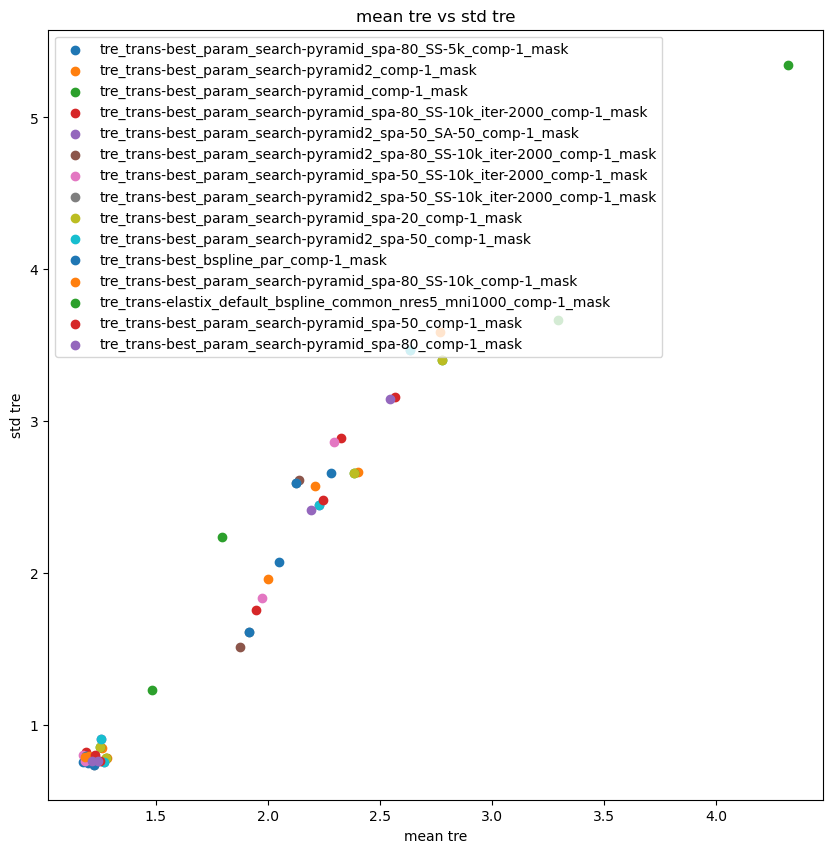

In [106]:
#get all paths for file in the result folder
result_path  = repo_path / 'data/results'
result_paths = list(result_path.glob('**/*.csv'))
#append all results in a dataframe
all_results_df = pd.DataFrame()
for i in result_paths:
    #read the csv file
    df = pd.read_csv(i)
    #get the method name
    method = i.stem
    #add a column with the method name at the end of df
    df['method'] = method
    #append the dataframe using concat
    all_results_df = pd.concat([all_results_df, df], ignore_index=True)
#make plot with mean tre as x coordinate and std as y coordinate using all_results_df
plt.figure(figsize=(10,10))
#give the same color to points of the same method according to df['method'].
for i in all_results_df['method'].unique():
    plt.scatter(all_results_df[all_results_df['method'] == i]['mean_tre'], all_results_df[all_results_df['method'] == i]['std_tre'], label=i)
#show the legend
plt.legend()

plt.xlabel('mean tre')
plt.ylabel('std tre')
plt.title('mean tre vs std tre')


## Box plots

Text(0.5, 1.0, 'Mean TRE box plot')

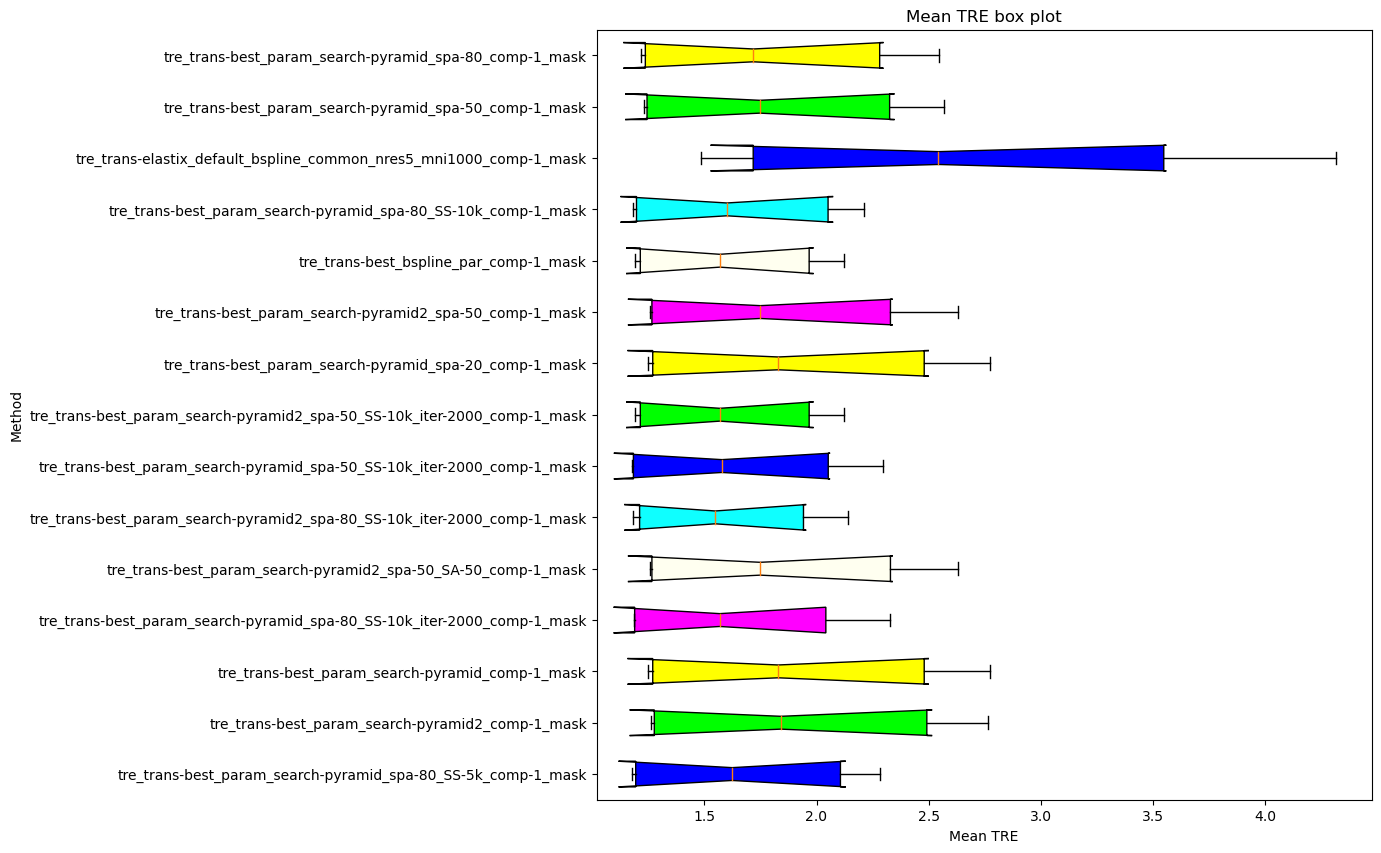

In [107]:

#We will check the box plot for the mean and the standard deviation.
#get all paths for file in the result folder
result_path  = repo_path / 'data/results'
result_paths = list(result_path.glob('**/*.csv'))
for i in result_paths:
    #read the csv file
    df = pd.read_csv(i)
    #get the method name
    method = i.stem
    #add a column with the method name at the end of df
    df['method'] = method
    #append the dataframe using concat
    all_results_df = pd.concat([all_results_df, df], ignore_index=True)
    
#get box plot for mean tre for each method
fig, ax = plt.subplots(figsize=(10,10))
bp = ax.boxplot([all_results_df[all_results_df['method'] == i]['mean_tre'] for i in all_results_df['method'].unique()], labels=all_results_df['method'].unique(), patch_artist=True, notch=True, vert=0)
colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF',
          '#FFFFF0', '#0FFFFF'
          ]
 
# for patch, color in zip(bp['boxes'], colors):
#     patch.set_facecolor(colors)

for i, patch in enumerate(bp['boxes']):
    patch.set_facecolor(colors[i%len(colors)])

ax.set_xlabel('Mean TRE')
ax.set_ylabel('Method')
ax.set_title('Mean TRE box plot')
#show information about the box ploT